# 2. Exploratory Data Analysis

## 2.1 Introduction

I now have a data file for each antibiotic (azithromycin, ciprofloxacin, and ceftrixone) that contains:
<ul>
    <li>sample id for each strain</li>
    <li>minimum inhibitory concentration (MIC)</li>
    <li>whether the strain is resistant to the antibiotic</li>
    <li>year sample was taken</li>
    <li>country of origin</li>
    <li>continent of origin</li>
    <li>many columns of unitigs and whether or not they are present</li>
</ul>

My goal for this analysis is to gather more information about the differences between resistant and nonresistant strains, to identify unitigs highly correlated with resistance or sensitivity, and to identify possible clusters of unitigs.

## 2.2 Package Importing

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 2.3 Data Loading

In [2]:
# Loading azithromycin data
azm_data = pd.read_csv('../data/interim/azm_data.csv')
azm_data.head()

,Sample_ID,mic_azm,r_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,ERR1549286,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,ERR1549290,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,ERR1549291,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,ERR1549287,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,ERR1549288,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Loading cip data
cip_data = pd.read_csv('../data/interim/cip_data.csv')
cip_data.head()

,Sample_ID,mic_cip,r_cip,Year,Country,Continent,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
0,SRR1661154,0.500,0,1996.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,SRR1661156,16.000,1,1997.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,SRR1661157,0.016,0,1998.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,SRR1661158,0.500,0,2000.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,SRR1661159,0.063,0,2001.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# Loading cfx data
cfx_data = pd.read_csv('../data/interim/cfx_data.csv')
cfx_data.head()

,Sample_ID,mic_cfx,r_cfx,Year,Country,Continent,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,...,CATGTCTTTCGGTTATGGCCTGCAATTAAGC,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG
0,SRR1661154,0.125,0,1996.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,SRR1661156,0.063,0,1997.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,SRR1661157,0.063,0,1998.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,SRR1661158,0.250,1,2000.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,SRR1661159,0.001,0,2001.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# rename mic and resistance columns
azm_data = azm_data.rename(columns = {'mic_azm':'mic','r_azm':'resistant'})
cip_data = cip_data.rename(columns = {'mic_cip':'mic','r_cip':'resistant'})
cfx_data = cfx_data.rename(columns = {'mic_cfx':'mic','r_cfx':'resistant'})

## 2.4 Resistance Analysis

### 2.4.1 Number of Resistant Strains

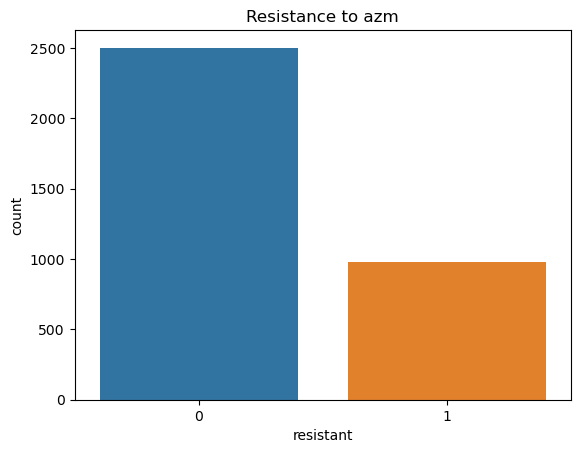

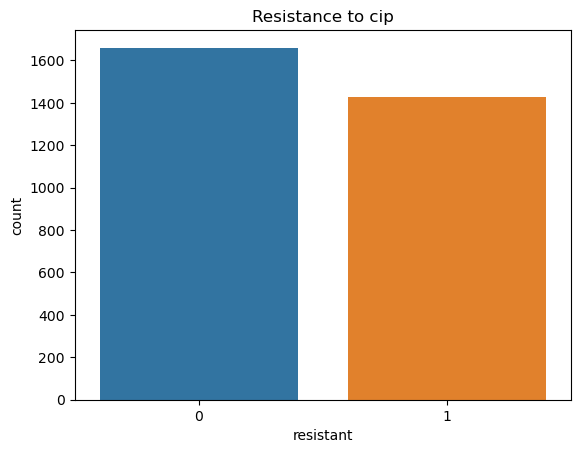

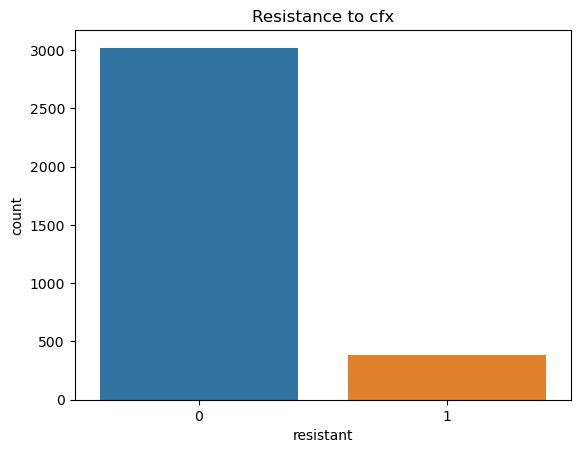

In [6]:
# plot resistance data
dfs = [azm_data,cip_data,cfx_data]
df_names = ['azm','cip','cfx']
for i in range(3):
    g = sns.countplot(x='resistant',data=dfs[i])
    g.set_title(f"Resistance to {df_names[i]}")
    plt.show()

cip has the largest amount of resistant strains at 1400 and cfx the least around 450.

### 2.4.2 Number of unitigs

Next I looked at the total number of unitigs in each same in hope of finding a means of reducing dimensionality.

In [7]:
# add total unitigs column
azm_data['total_unitig_count'] = azm_data[azm_data.columns[6:]].sum(axis=1)
cip_data['total_unitig_count'] = cip_data[cip_data.columns[6:]].sum(axis=1)
cfx_data['total_unitig_count'] = cfx_data[cfx_data.columns[6:]].sum(axis=1)

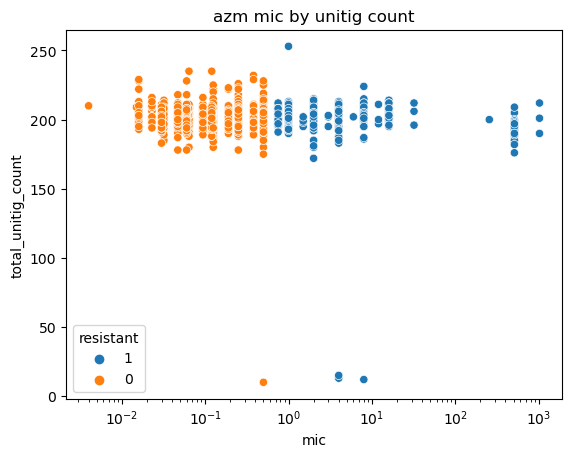

In [8]:
sir_order = [1,0]
g = sns.scatterplot(x='mic',y='total_unitig_count',data=azm_data,hue='resistant',hue_order=sir_order)
plt.xscale('log')
g.set_title("azm mic by unitig count")
plt.show()

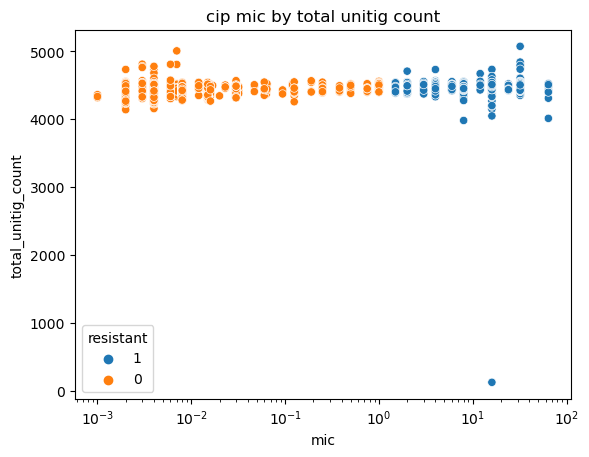

In [9]:
g = sns.scatterplot(x='mic',y='total_unitig_count',data=cip_data,hue='resistant',hue_order=sir_order)
plt.xscale('log')
g.set_title("cip mic by total unitig count")
plt.show()

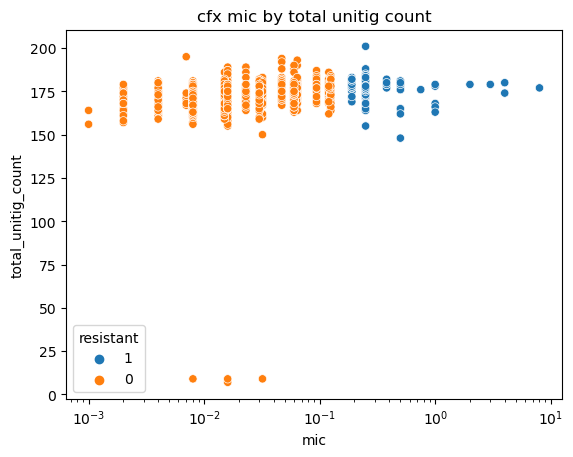

In [10]:
g = sns.scatterplot(x='mic',y='total_unitig_count',data=cfx_data,hue='resistant',hue_order=sir_order)
g.set_title("cfx mic by total unitig count")
plt.xscale('log')
plt.show()

The mic does not seem to affect the total unitig count. Notably, each dataset has a couple outliers with extremely low total unitig counts.

### 2.4.3 Locations

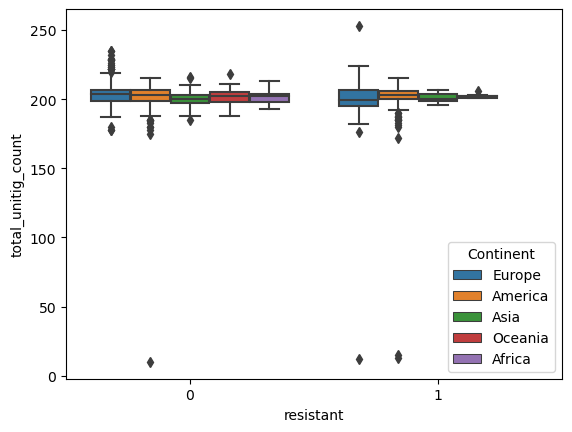

In [11]:
sns.boxplot(x='resistant',y='total_unitig_count',data=azm_data,hue='Continent');

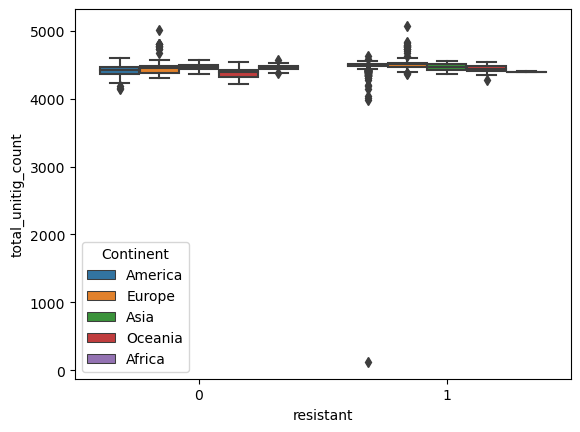

In [12]:
sns.boxplot(x='resistant',y='total_unitig_count',data=cip_data,hue='Continent');

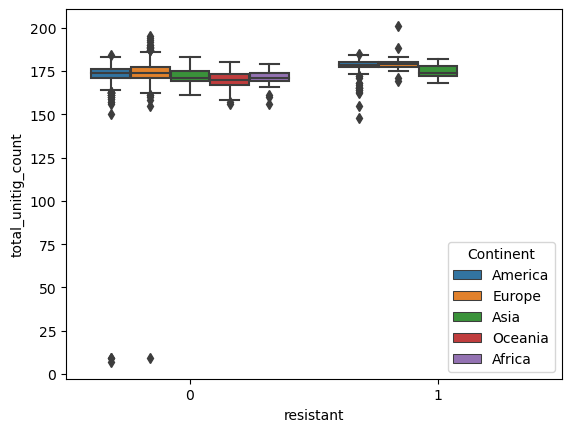

In [13]:
sns.boxplot(x='resistant',y='total_unitig_count',data=cfx_data,hue='Continent');

Continent has very little effect on the total number of unitigs.

Additionally, I explored the unitigs not present in each continent to see if selecting specific continents could help reduce dimensionality.

In [14]:
continent_unused_unitigs = []
continent_names = azm_data['Continent'].unique().tolist()
for continent in azm_data['Continent'].unique():
    samples_per_unitig = azm_data[azm_data['Continent']==continent][azm_data.columns[6:-2]].sum(axis=0)
    unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
    print(f"{continent}: {unused_unitig_count} unitigs not present.")

Europe: 108 unitigs not present.
America: 115 unitigs not present.
nan: 514 unitigs not present.
Asia: 189 unitigs not present.
Oceania: 188 unitigs not present.
Africa: 232 unitigs not present.


In [15]:
for continent in cip_data['Continent'].unique():
    samples_per_unitig = cip_data[cip_data['Continent']==continent][cip_data.columns[6:-2]].sum(axis=0)
    unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
    print(f"{continent}: {unused_unitig_count} unitigs not present.")

America: 1478 unitigs not present.
nan: 8872 unitigs not present.
Europe: 1313 unitigs not present.
Asia: 2421 unitigs not present.
Oceania: 2201 unitigs not present.
Africa: 2928 unitigs not present.


In [16]:
samples_per_unitig = cip_data[cip_data['Continent'].isin(['Europe','America'])][cip_data.columns[6:-2]].sum(axis=0)
unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
print(f"Europe and America: {unused_unitig_count} unitigs not present.")

Europe and America: 692 unitigs not present.


Reducing the number of continents has the potential to reduce dimensionality. However, it does also potentially limit the power of the model as it would then become regionally restricted.

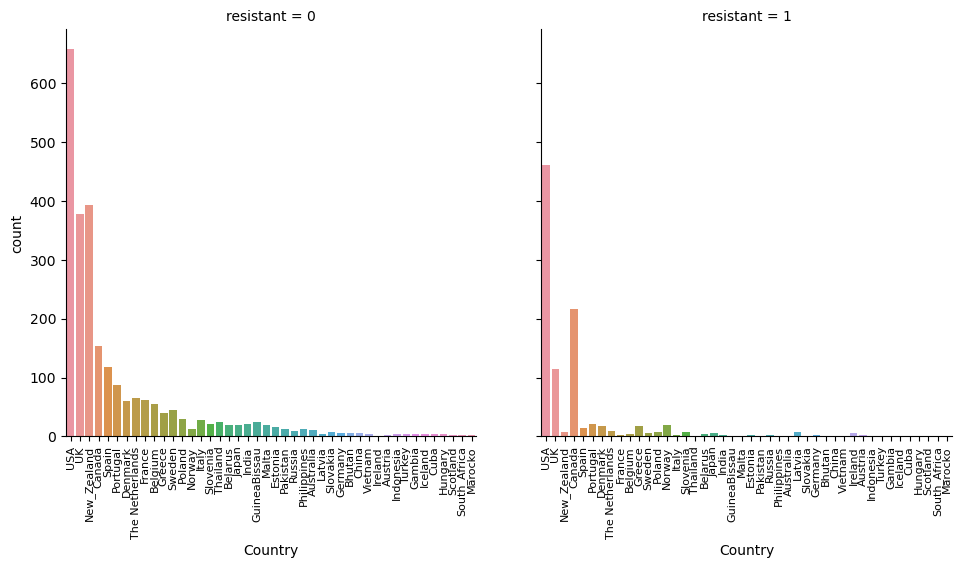

In [17]:
recurring_countries = azm_data.groupby('Country').filter(lambda x: len(x) > 2)
g = sns.catplot(kind='count', x='Country', data=recurring_countries,
            order=recurring_countries['Country'].value_counts().index, col='resistant')
g.set_xticklabels(fontsize=8,rotation=90);

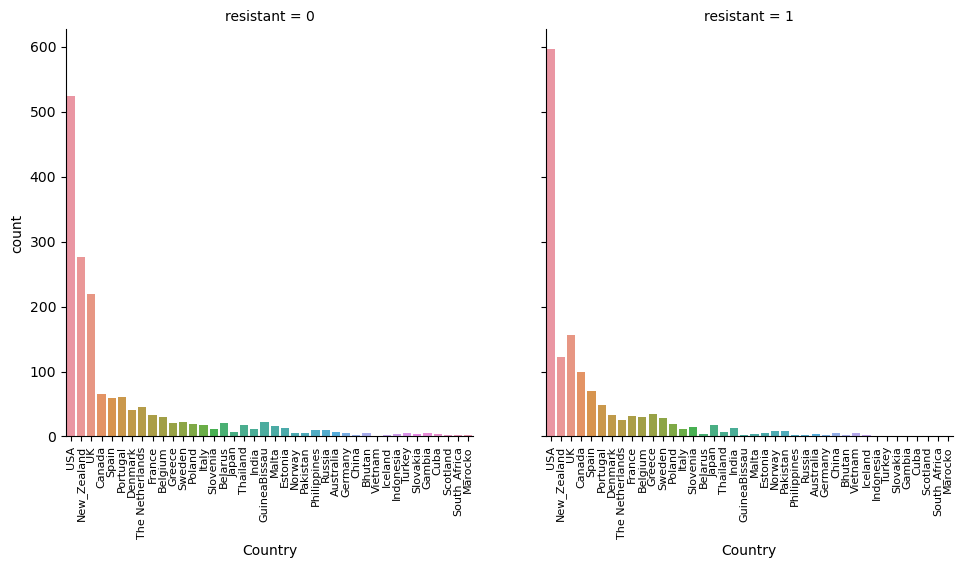

In [18]:
recurring_countries = cip_data.groupby('Country').filter(lambda x: len(x) > 2)
g = sns.catplot(kind='count', x='Country', data=recurring_countries,
            order=recurring_countries['Country'].value_counts().index, col='resistant')
g.set_xticklabels(fontsize=8,rotation=90);

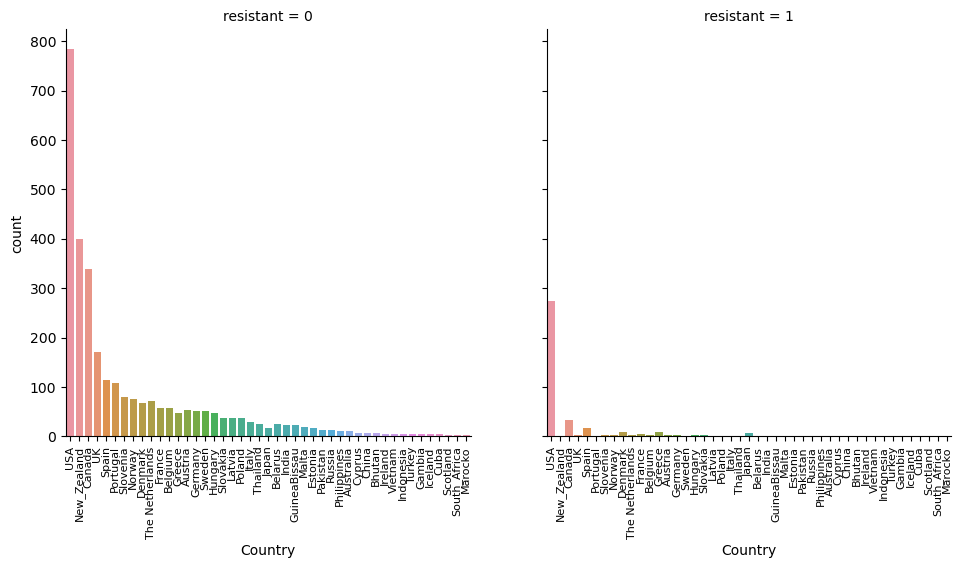

In [19]:
recurring_countries = cfx_data.groupby('Country').filter(lambda x: len(x) > 2)
g = sns.catplot(kind='count', x='Country', data=recurring_countries,
            order=recurring_countries['Country'].value_counts().index, col='resistant')
g.set_xticklabels(fontsize=8,rotation=90);

In [20]:
country_name = []
num_samples = []
num_unitigs = []
for country in cip_data['Country'].unique():
    
    total_samples = len(cip_data[cip_data['Country']==country])
    samples_per_unitig = cip_data[cip_data['Country']==country][cip_data.columns[6:-2]].sum(axis=0)
    unitig_count = samples_per_unitig[samples_per_unitig > 0].count()
    country_name.append(country)
    num_samples.append(total_samples)
    num_unitigs.append(unitig_count)
country_dict = {
    'country':country_name,
    'num_samples':num_samples,
    'num_unitigs':num_unitigs
}
country_df = pd.DataFrame(country_dict)
country_df

,country,num_samples,num_unitigs
0,Canada,164,6437
1,NaN,0,0
2,France,64,6181
3,Spain,129,6359
4,Italy,29,5768
...,...,...,...
57,Angola,1,4443
58,Guinea,1,4433
59,GuineaBissau,24,5547
60,Saudi_Arabia,1,4477


In [21]:
country_df[country_df['num_samples']>1].sort_values('num_unitigs')

,country,num_samples,num_unitigs
61,Ivory_Coast,2,4654
29,Jamaica,2,4857
54,CaboVerde,2,4877
31,Scotland,3,4885
49,HongKong,2,4898
53,Tanzania,2,4906
50,Malaysia,2,4910
18,Brasil,2,4916
43,Bhutan,7,4921
6,Hungary,2,4969


## 2.5 Unitig Correlation with Resistance

To further look into the many individual unitigs, I wanted to compare various aspects including:
<ul>
    <li>their presence in resistant samples</li>
    <li>their presence in sensitive samples)</li>
    <li>the chi-squared statistic with resistance</li>
    <li>the related p-value for significance</li>
</ul>

For the chi-square test, my null hypothesis is that each unitig and resistance are independent that are not correlated, and my alternate hypothesis is that the unitig is correlated with resistance.
I created a dataframe in order to analyze all of the above.

In [22]:
def unitig_analysis(df):
    """create a dataframe including unitig, total in resistant samples, total in sensitive samples
    chi-squared value, and p value based on resistance."""
    # Initialize lists 
    unitig = []
    total_in_R = []
    total_in_S = []
    total_in_all = []
    chi2_val = []
    p_val = []

    # iterate over columns and append lists for each unitig
    for col in df.columns[6:-1]:
        unitig.append(col)
        r_total = df.loc[df['resistant']==1,col].sum()
        s_total = df.loc[df['resistant']==0,col].sum()
        all_total = df[col].sum()

        total_in_R.append(r_total)
        total_in_S.append(s_total)
        total_in_all.append(all_total)

        data_crosstab = pd.crosstab(df['resistant'],df[col],
                                    margins=True,margins_name='Total')
        stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
        chi2_val.append(stat)
        p_val.append(p)
        
    # create dictionary
    unitig_analysis_dict = {
        'unitig': unitig,
        'total_in_R': total_in_R,
        'total_in_S': total_in_S,
        'total_in_all': total_in_all,
        'chi2_val': chi2_val,
        'p_val': p_val
    }

    # convert to dataframe
    unitig_analysis = pd.DataFrame(unitig_analysis_dict)
    return unitig_analysis

### 2.5.1 Unitigs Correlated with azm Resistance

In [23]:
azm_unitig_analysis = unitig_analysis(azm_data)

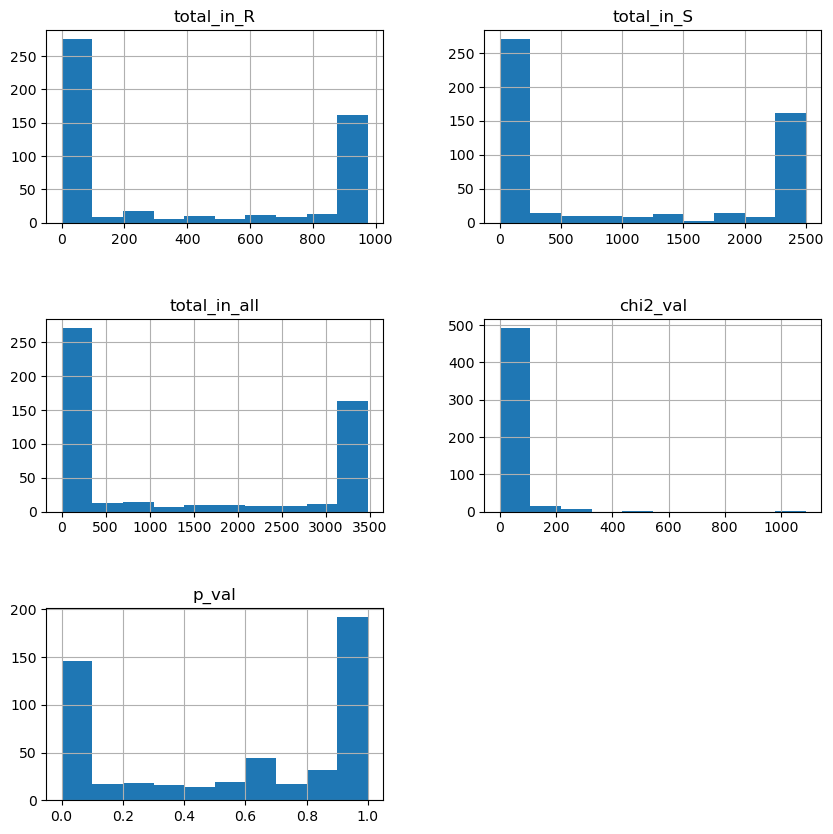

In [24]:
# plot histograms for all variables
azm_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

The distributions for totals in resistant and sensitive samples are almost identical with peaks near zero and the maximum number of samples in each group. This is expected as the majority of unitigs are not connected to resistance and the shape mirrors the distribution for all samples. There appears to be one outlier chi-squared value, which is of interest as it could be a great predictor of resistance. The chi-square and p values show that there may be a fair number of potentially significant unitigs correlated to resistance.

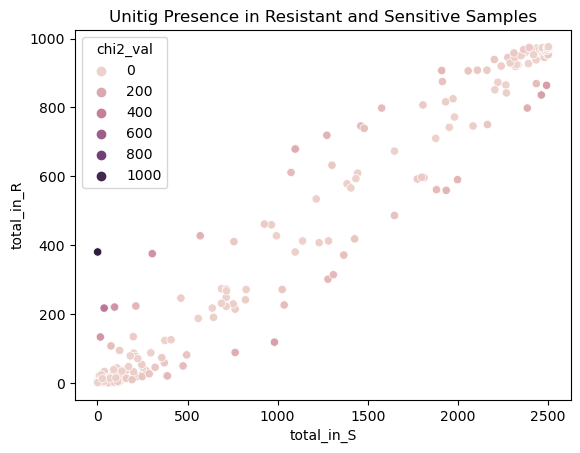

In [25]:
# plot total_in_S vs total_in_R with hue as chi2_val
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=azm_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in Resistant and Sensitive Samples');

There is a linear relationship between the total azm sensitive samples with a unitig with the total resistant samples with that unitig. Our focus is on the points deviating from this relationship. We can see our outlier chi-squared value that is in close to 400 resistant samples and almost no sensitive samples.

In [26]:
# Sort by chi-squared value
azm_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
150,GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGC...,380,1,381,1088.869848,1.957310e-234
345,CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA,217,37,254,446.760349,2.178750e-95
347,TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC,375,304,679,308.443331,1.634308e-65
173,AAAGGCGTTTGCGTTGCGAGGAGTTCATATC,220,95,315,299.490111,1.395699e-63
346,AACATCAGGAAAACGGCACATTCCACGCCGT,133,16,149,288.816382,2.798392e-61
316,TCATCTCGTATGCCGTCTTCTGCTTGAAAAA,864,2492,3356,254.465907,7.102805e-54
240,GCCGTCTTATTATAGGGAAGGCGTTCCCCGGAGCAC,118,982,1100,239.481360,1.199878e-50
315,TACAAGCCTTGTGGCTTGTTGCCCTCTCTCTAGC,836,2463,3299,235.108006,1.049207e-49
352,CAAATCAATACGCTGACTAAAGGTTGCAATTTA,679,1097,1776,185.937267,3.955654e-39
351,CTTCCCCAAAAATATCGACACACTCGAAACTCTCCTGACCGACAAC...,680,1100,1780,185.704337,4.438743e-39


In [27]:
for i in range(10):
    unitig = azm_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,0]
    print(f"Rank {i+1}: {unitig}")

Rank 1: GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG
Rank 2: CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA
Rank 3: TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC
Rank 4: AAAGGCGTTTGCGTTGCGAGGAGTTCATATC
Rank 5: AACATCAGGAAAACGGCACATTCCACGCCGT
Rank 6: TCATCTCGTATGCCGTCTTCTGCTTGAAAAA
Rank 7: GCCGTCTTATTATAGGGAAGGCGTTCCCCGGAGCAC
Rank 8: TACAAGCCTTGTGGCTTGTTGCCCTCTCTCTAGC
Rank 9: CAAATCAATACGCTGACTAAAGGTTGCAATTTA
Rank 10: CTTCCCCAAAAATATCGACACACTCGAAACTCTCCTGACCGACAACCGCATCTGGAAACAG


These are our top ten most correlated unitigs to azm resistance. Our outlier is GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG which is present in 380 resistant samples and only 1 sensitive one. Additionally, we can see that there are many unitigs with extremely high chi-squared values and low p values, meaning they are significantly correlated with resistance.

Total unitigs with p < 0.01: 122
Total unitigs with p < 0.001: 103
Total unitigs with p < 0.0001: 87


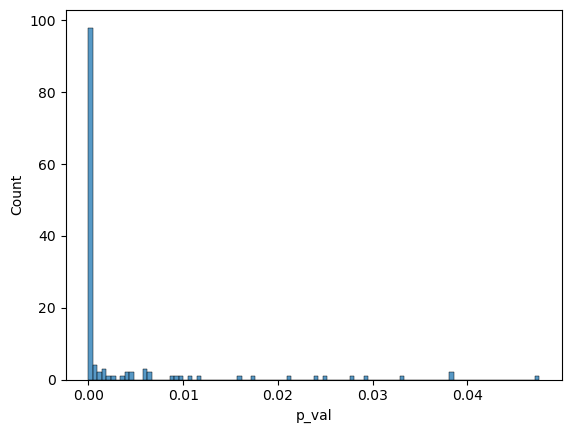

In [28]:
# plot histogram for p values less than 0.05
sns.histplot(x='p_val',data = azm_unitig_analysis[azm_unitig_analysis['p_val'] < 0.05].sort_values('p_val'),bins=100);
for p in [0.01,0.001,0.0001]:
    print(f"Total unitigs with p < {p}: {len(azm_unitig_analysis[azm_unitig_analysis['p_val'] < p])}")

There are 122 unitigs with p values less than 0.01, and the majority of those have substantially statistically significant correlations with resistance.

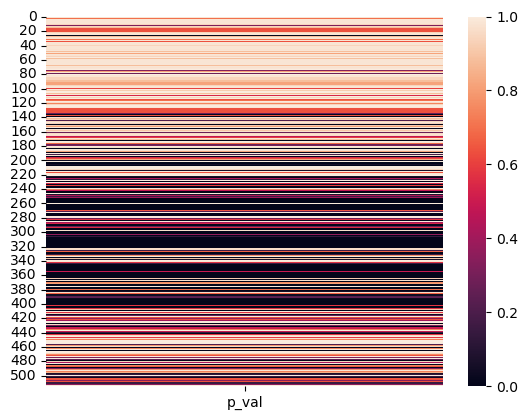

In [29]:
# Create heatmap of p_values
sns.heatmap(azm_unitig_analysis[['p_val']]);

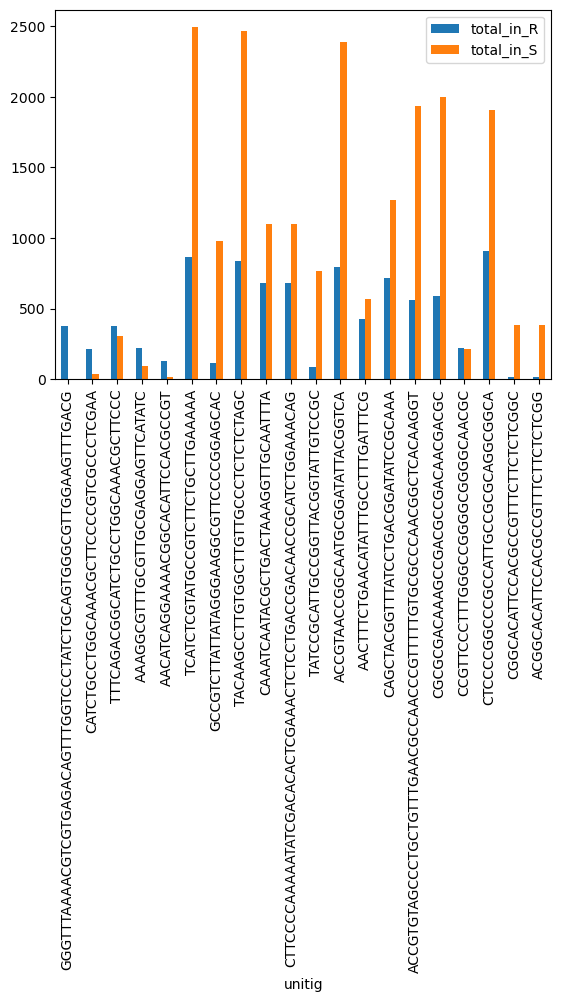

In [30]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
azm_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar');

While there are many unitigs with high chi-squared values, many of them are still present in the majority of sensitive samples.

### 2.5.2 Unitigs Correlated with cip Resistance

In [31]:
cip_unitig_analysis = unitig_analysis(cip_data)

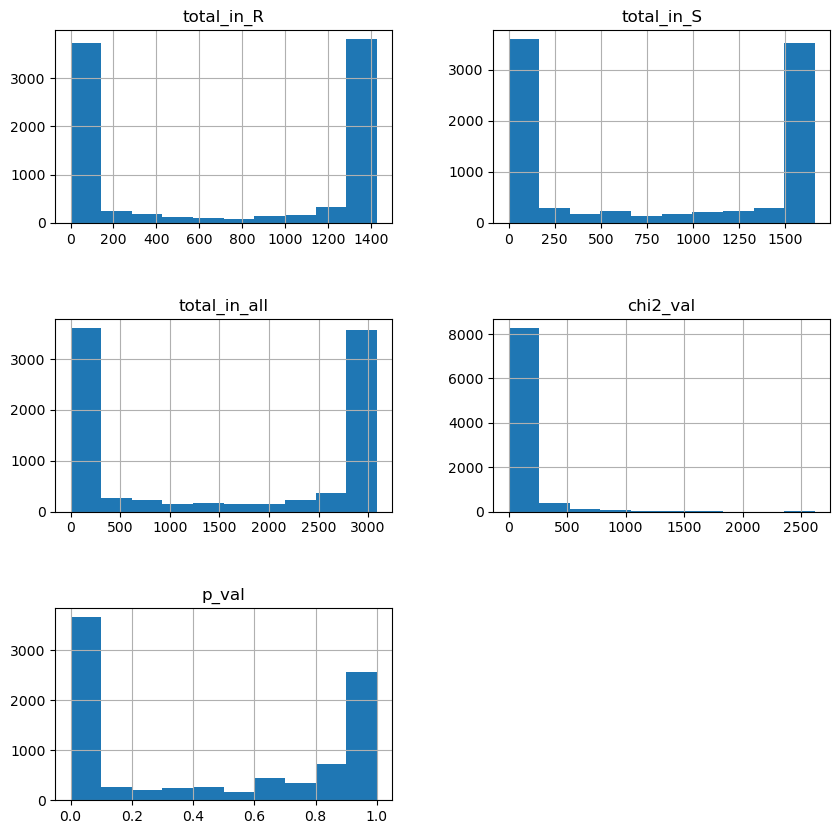

In [32]:
# plot histograms for all variables
cip_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

Here we see similar distributions as azm, but far more unitigs as there are 8873 unitigs in the cip data.

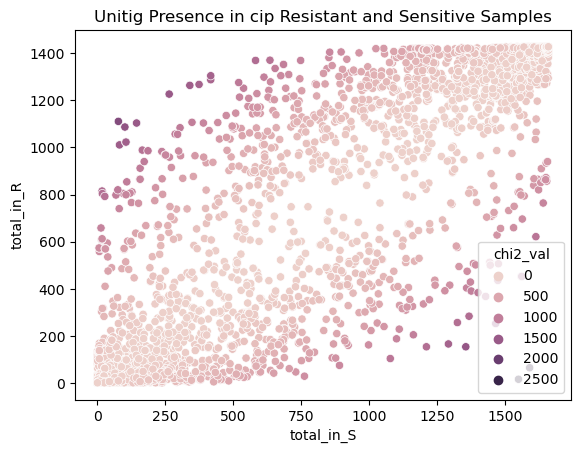

In [33]:
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=cip_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in cip Resistant and Sensitive Samples');

In the cip data, there appears to be more variance between the totals in resistant and sensitive samples. There are more unitigs with high chi-squared values, and far higher values than in azm as well. This may be because cip resistance is more common than azm resistance and therefore genes for resistances have been more highly shared and are more homogenous than for azm or cpx.

In [34]:
cip_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
5502,GCGCAGCCGCAAATCTTGTTTTCCCATTCCGCC,15,1550,1565,2617.699879,0.000000e+00
4717,GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC,64,1591,1655,2576.301043,0.000000e+00
4000,AAATTGCGGATCGATGCGCGAAGGGTCGAATGC,1111,77,1188,1735.886821,0.000000e+00
3992,CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG,1087,101,1188,1590.697462,0.000000e+00
4719,GACTACATCAGCGGCAACATCTTGTTTATGCTGACCG,252,1466,1718,1553.077992,0.000000e+00
4679,CGCACATTTTGGCTTTATCTTTTGGGCGCGCTGACTGCCCGTTTCG...,153,1356,1509,1547.468974,0.000000e+00
4019,TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA,1227,264,1491,1507.247630,0.000000e+00
3996,GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT,1104,144,1248,1501.716541,0.000000e+00
3906,CAGGCGGAAATATAGTGGATTAAATTTAAAC,1011,81,1092,1459.314890,0.000000e+00
4003,TGCCGCAGCAGAACCTAAAGCCGAGGAAAAAGCCGC,1264,340,1604,1423.379396,5.888325e-307


In [35]:
for i in range(10):
    unitig = cip_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,0]
    print(f"Rank {i+1}: {unitig}")

Rank 1: GCGCAGCCGCAAATCTTGTTTTCCCATTCCGCC
Rank 2: GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC
Rank 3: AAATTGCGGATCGATGCGCGAAGGGTCGAATGC
Rank 4: CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG
Rank 5: GACTACATCAGCGGCAACATCTTGTTTATGCTGACCG
Rank 6: CGCACATTTTGGCTTTATCTTTTGGGCGCGCTGACTGCCCGTTTCGGCATCGGCGTG
Rank 7: TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA
Rank 8: GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT
Rank 9: CAGGCGGAAATATAGTGGATTAAATTTAAAC
Rank 10: TGCCGCAGCAGAACCTAAAGCCGAGGAAAAAGCCGC


These are our top ten most correlated unitigs to cip resistance. The top 9 all have a calculated p value of 0.

Total unitigs with p < 0.01: 3180
Total unitigs with p < 0.0001: 2639
Total unitigs with p < 1.0000000000000002e-06: 2343
Total unitigs with p < 1e-08: 2063
Total unitigs with p < 1.0000000000000002e-10: 1877


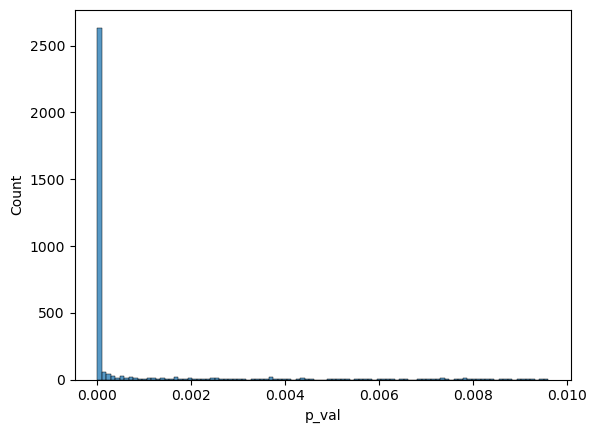

In [36]:
sns.histplot(x='p_val',data = cip_unitig_analysis[cip_unitig_analysis['p_val'] < 0.01].sort_values('p_val'),bins=100);
for i in range(1,6):
    p = 0.01**i
    print(f"Total unitigs with p < {p}: {len(cip_unitig_analysis[cip_unitig_analysis['p_val'] < p])}")

There are 3180 unitigs with a p value less than 0.01 with the majority being far below that.

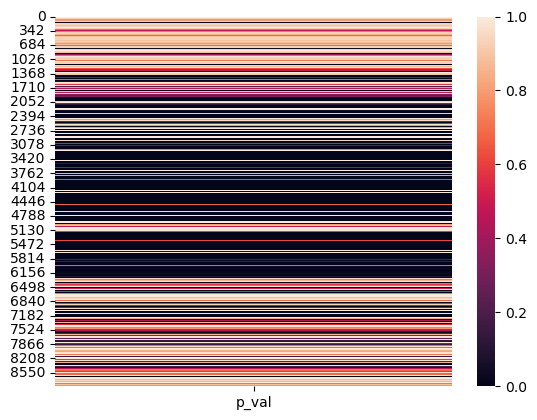

In [37]:
sns.heatmap(cip_unitig_analysis[['p_val']]);

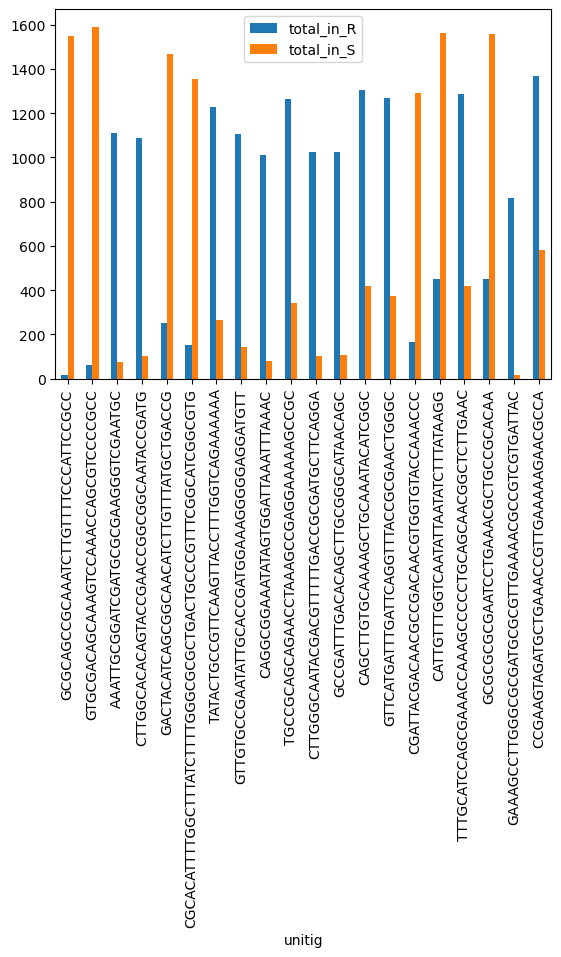

In [38]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
cip_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar');

Because cip resistance is more common than azm resistance, here we see larger differences between unitigs in R versus S.

### 2.5.2 Unitigs Correlated with cfx Resistance

In [39]:
cfx_unitig_analysis = unitig_analysis(cfx_data)

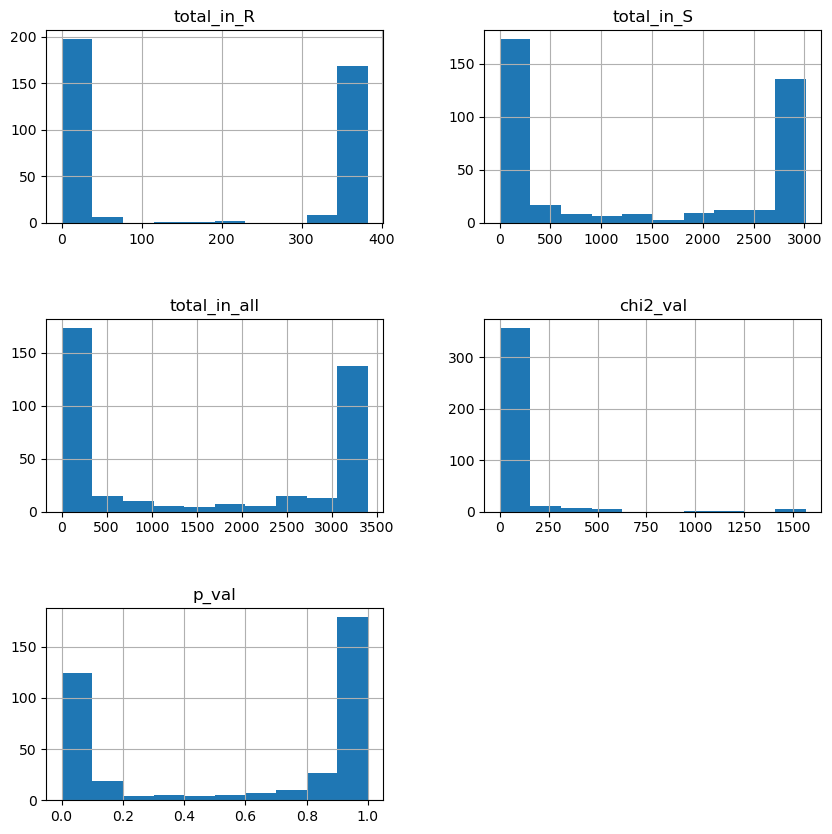

In [40]:
# plot histograms for all variables
cfx_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

Here we see extremely similar distributions as azm. Fewer unitigs have lower p values, which reflects how cfx has the least resistance, so there would be fewer sequences related to resistance.

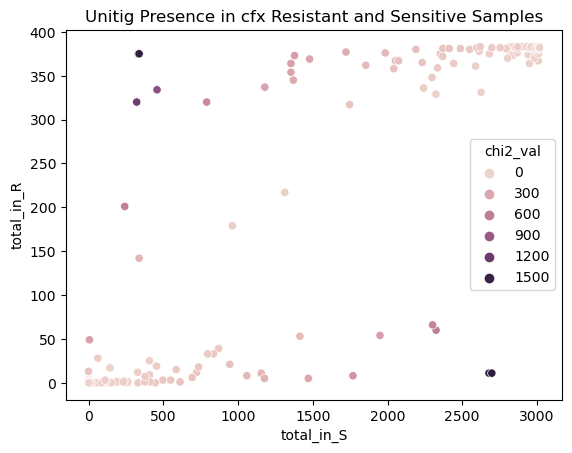

In [41]:
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=cfx_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in cfx Resistant and Sensitive Samples');

In the cfx data, there seem to be clusters of unitigs not present in resistant samples or present in most of the resistant strains. This is most likely again due to the lower number of resistant strains.

In [42]:
cfx_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
255,AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGG...,11,2698,2709,1565.261020,0.000000e+00
190,AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC,375,334,709,1554.460646,0.000000e+00
191,GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT,375,338,713,1543.320493,0.000000e+00
254,TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGAC...,11,2679,2690,1512.064543,0.000000e+00
186,CAAACAACTTCTATTACGCCAAAAGTCAGGCGATGCTCTACACC,320,322,642,1179.739687,3.928925e-254
193,GGATTCCGGCAAAGTGGATGCAACCGATACATTCAATACCCTGCCT...,334,458,792,987.851132,1.532470e-212
256,AAAACGCCGTCGTGCGTCAGTGCGGTATAGGC,60,2325,2385,609.606200,1.291628e-130
151,TGCTAAGAAACAAGGACAATGGCAACAGGATAGA,201,242,443,593.541737,3.871967e-127
257,TAAAGGACAAAGACAGGAGGCGCGAATATACTTA,66,2302,2368,558.912065,1.206846e-119
192,GGGCGATTTTCGTTTTCTTGGCGGCGTATTCGCCGG,320,790,1110,509.381243,6.265896e-109


In [43]:
for i in range(10):
    unitig = cfx_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,0]
    print(f"Rank {i+1}: {unitig}")

Rank 1: AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGGTAATGGCGTTTTAATTCTT
Rank 2: AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC
Rank 3: GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT
Rank 4: TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGACTTGCCTTTCTGTTCGAG
Rank 5: CAAACAACTTCTATTACGCCAAAAGTCAGGCGATGCTCTACACC
Rank 6: GGATTCCGGCAAAGTGGATGCAACCGATACATTCAATACCCTGCCTTACAAAATCGGT
Rank 7: AAAACGCCGTCGTGCGTCAGTGCGGTATAGGC
Rank 8: TGCTAAGAAACAAGGACAATGGCAACAGGATAGA
Rank 9: TAAAGGACAAAGACAGGAGGCGCGAATATACTTA
Rank 10: GGGCGATTTTCGTTTTCTTGGCGGCGTATTCGCCGG


These are our top ten most correlated unitigs to cip resistance. The top 4 all have a calculated p value of 0.

Total unitigs with p < 0.01: 106
Total unitigs with p < 0.0001: 87
Total unitigs with p < 1.0000000000000002e-06: 76
Total unitigs with p < 1e-08: 65
Total unitigs with p < 1.0000000000000002e-10: 61


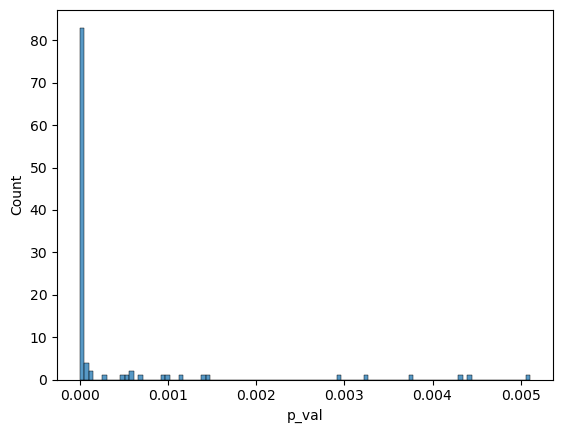

In [44]:
sns.histplot(x='p_val',data = cfx_unitig_analysis[cfx_unitig_analysis['p_val'] < 0.01].sort_values('p_val'),bins=100);
for i in range(1,6):
    p = 0.01**i
    print(f"Total unitigs with p < {p}: {len(cfx_unitig_analysis[cfx_unitig_analysis['p_val'] < p])}")

There are 106 unitigs with a p value less than 0.01, giving similar results to azm.

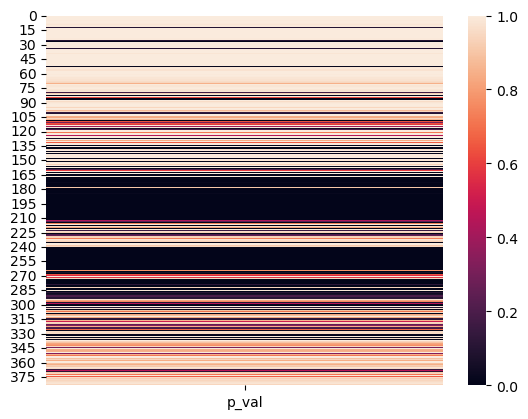

In [45]:
sns.heatmap(cfx_unitig_analysis[['p_val']]);

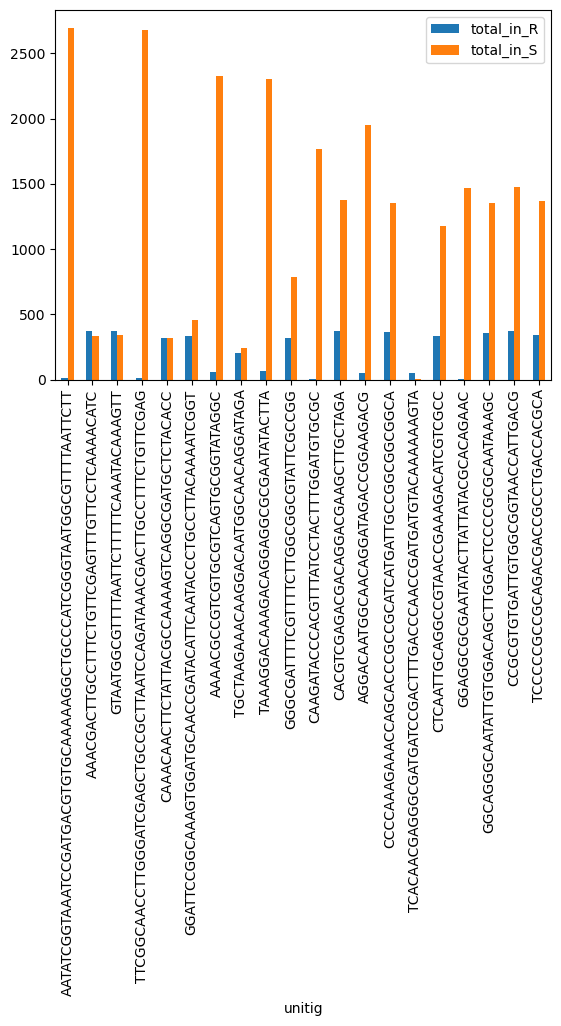

In [46]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
cfx_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar');

A few unitigs are overwhemingly present in sensitive strains, such as AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGGTAATGGCGTTTTAATTCTT and TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGACTTGCCTTTCTGTTCGAG. There are also many unitigs that are present in almost all resistant strains but proportionally fewer sensitive ones, such as AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC and GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT.

# attempt at k-means clustering

In [47]:
X = cip_data.iloc[:,6:-1]
X.head()

,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,"AAACCTGCCGCAGCCGGCGCATCTTTGGGCGGCGGTCTGGAC,AACGTGGTGTACCAAACCCGCCGTTTCGACCGTTATAAAGAA",CCCAACACACTCGACGTATGGATGAGCCACGGC,TTTTCAACAAAAAACTGCTTGTCCAACGGCAAA,TTTCAACCGGATAGCTGAAAAAACAAAAAAGTTCGATA,CATCACTTCCCGCTGCCGTTTTTTTGTTTCAGACGGCAT,"AAACTGCTTGTCCAACGGCAAACCGGCGGGCAGG,CACATAGAAAAGCGGAACAAGGAACACGGATAAAAGCGT,TTTCCTCCGACCATACAGAAGATACCATACGCCTCTCCAAACGTATGG,AGAAAGTGGAATTGAGGAAACCTTTTTATCCGATGAG,TGGATATAGTCTTTTAATTCGTCTTTCGTCGCCCAAGCAGTGCCATAA",...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


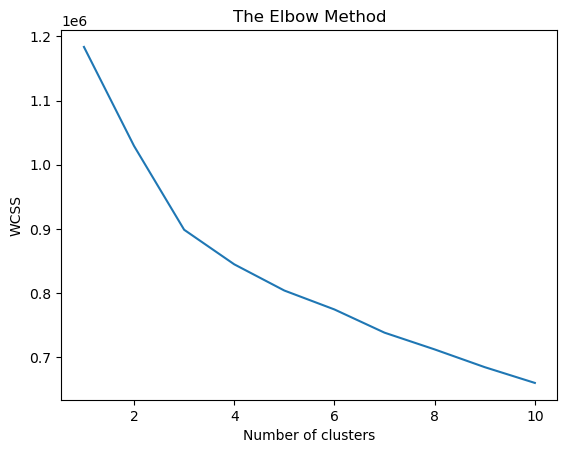

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.to_numpy()

# Attempt at K-modes clustering

In [50]:
from kmodes.kmodes import KModes

In [61]:
data = azm_data.iloc[:,6:-1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 98976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 98976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 98976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 98976.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 472, cost: 86239.0
Run 1, iteration: 2/100, moves: 189, cost: 86097.0
Run 1, iteration: 3/100, moves: 69, cost: 86056.0
Run 1, iteration: 4/100, moves: 6, cost: 86056.0
Init: initializing centroids
Init: initializing clus

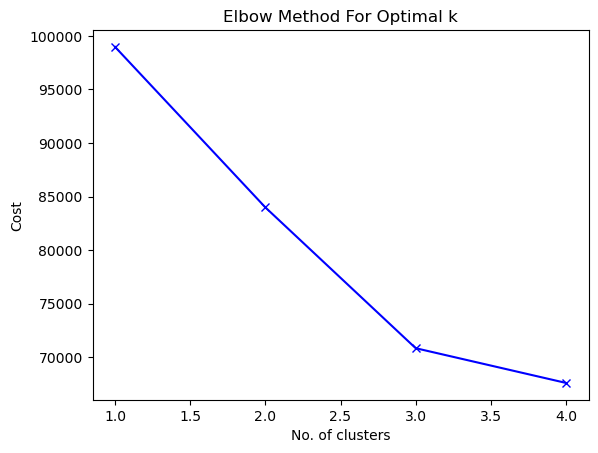

In [52]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1007, cost: 70855.0
Run 1, iteration: 2/100, moves: 88, cost: 70830.0
Run 1, iteration: 3/100, moves: 0, cost: 70830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1281, cost: 75254.0
Run 2, iteration: 2/100, moves: 854, cost: 70830.0
Run 2, iteration: 3/100, moves: 70, cost: 70830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1082, cost: 72366.0
Run 3, iteration: 2/100, moves: 587, cost: 70830.0
Run 3, iteration: 3/100, moves: 62, cost: 70830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 393, cost: 70830.0
Run 4, iteration: 2/100, moves: 22, cost: 70830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1551, cost

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [63]:
df = azm_data.copy()
df['cluster'] = clusters

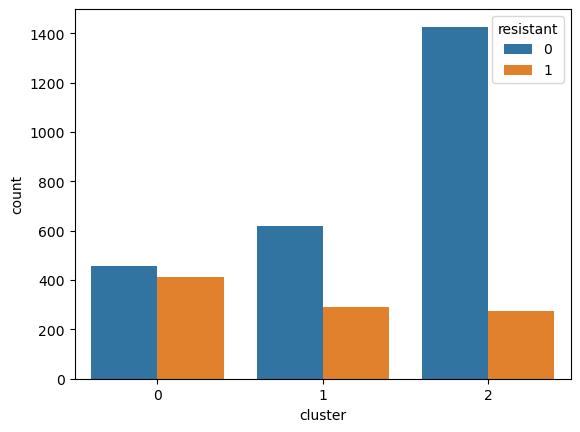

In [64]:
sns.countplot(x='cluster',data=df,hue='resistant');

In [65]:
def kmode_elbow(data):
    """performs 5 runs of kmode with K as 1, 2, 3, and 4 to find optimal K.
    Plots the elbow curve."""
    cost = []
    K = range(1,5)
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
        kmode.fit_predict(data)
        cost.append(kmode.cost_)

    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    

In [66]:
def kmode_clusters(data,K):
    """Performs 5 runs of kmode clustering. Returns the clusters of the
    best run as an array."""
    kmode = KModes(n_clusters=K, init = "random", n_init = 5, verbose=1)
    clusters = kmode.fit_predict(data)

Should I attempt to cluster the unitigs instead???

In [67]:
data = azm_data.iloc[:,6:-1].T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477
CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AACGGGTTTTCAGACGGCATTCGATATCGGGACG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
kmode_elbow(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 703490.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 703490.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 703490.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 703490.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 703490.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 98266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 98266.0
Init: initializing centroids
Init: initializing clusters
Starting iter

cip

In [53]:
data = cip_data.iloc[:,6:-1]

In [54]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1635032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1635032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1635032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1635032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1635032.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 1454778.0
Run 1, iteration: 2/100, moves: 0, cost: 1454778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 690, cost: 1467633.0
Run 2, 

KeyboardInterrupt: 

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

In [57]:
df = cip_data.copy()
df['cluster'] = clusters

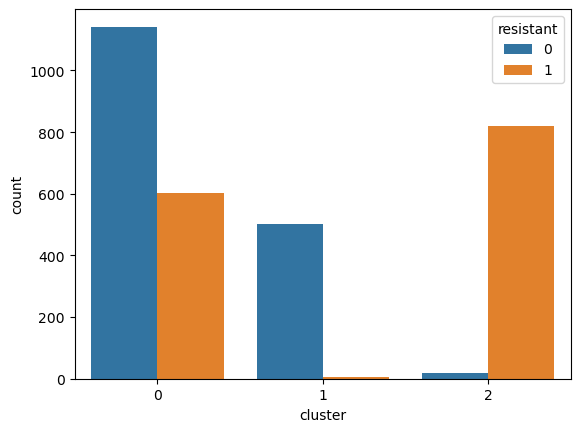

In [60]:
sns.countplot(x='cluster',data=df,hue='resistant');